In [2]:
%load_ext autoreload
%autoreload 2

# Does weighting the Loss Help?

In [3]:
import autorootcwd
import os
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Testing Alphas

In [8]:
DIR = './results/weight_alpha_search'
files = os.listdir(DIR)
rows = []
for f in files:
    alpha = f.split('_')[1]
    with open(f"{DIR}/{f}/val_metrics.json") as f:
        data = json.load(f)
        rows.append({
            'alpha': alpha,
            'accuracy': data['mean']['acc'],
            'root': data['mean']['root'],
            'majmin': data['mean']['majmin'],
            'third': data['mean']['third'],
            'seventh': data['mean']['seventh'],
            'mirex': data['mean']['mirex'],
            'mean_acc_class': data['class_wise']['acc']['mean'],
            'median_acc_class': data['class_wise']['acc']['median'],
        })
 

df = pd.DataFrame(rows)
# Round this clumn to 2 decimal places
# df['alpha'] = df['alpha'].astype(float)
# df['accuracy'] = df['accuracy'].round(2)
df.sort_values('alpha', ascending=True, inplace=True)

Using all filenames!


In [9]:
df

,alpha,accuracy,root,majmin,third,seventh,mirex,mean_acc_class,median_acc_class
6,0,60.198375,78.428361,76.049297,75.338128,62.468808,79.479692,19.376959,1.083215
4,0.1,60.142781,78.191696,75.845870,75.179261,62.347718,79.666387,20.754780,4.330773
9,0.2,60.359342,79.071139,76.587710,75.972107,62.498639,78.881363,22.727189,7.585539
8,0.3,60.197447,79.208948,76.635455,76.122973,62.264655,78.809467,23.882967,10.457683
7,0.4,59.118561,79.190832,76.270506,75.967601,61.077049,78.201304,25.538945,16.808852
10,0.5,57.610900,78.678043,75.335782,75.314796,59.425965,77.579748,27.482591,23.605806
3,0.6,55.857368,78.371860,74.483971,74.851553,57.552221,76.836575,28.560170,28.388207
0,0.7,53.084053,77.729017,73.027308,74.014250,54.683509,75.764094,28.885291,30.509180
2,0.8,52.248808,77.090018,72.454977,73.645085,53.807832,75.872308,29.243649,31.924391
1,0.9,48.190187,76.294168,70.330327,72.485462,49.444275,74.190009,31.129352,34.994590


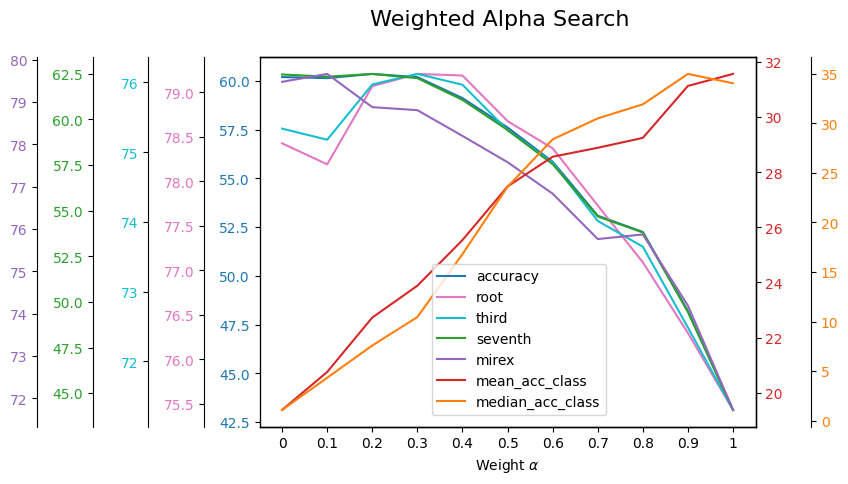

In [12]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel(r'Weight $\alpha$')
# ax1.set_xticks(np.linspace(0, 1, 11))

ax1.plot(df['alpha'], df['accuracy'], color=color)
# Remove y-axis ticks
ax1.tick_params(axis='y', labelcolor=color)
# ax1.tick_params(axis='x', rotation=45)

# Also plot root
ax6 = ax1.twinx()
color = 'tab:pink'
ax6.plot(df['alpha'], df['root'], color=color)
ax6.tick_params(axis='y', labelcolor=color)
ax6.yaxis.tick_left()
ax6.spines['left'].set_position(('outward', 40))

# Third
ax7 = ax1.twinx()
color = 'tab:cyan'
ax7.plot(df['alpha'], df['third'], color=color)
ax7.tick_params(axis='y', labelcolor=color)
ax7.yaxis.tick_left()
ax7.spines['left'].set_position(('outward', 80))

# Also plot sevenths
ax3 = ax1.twinx()
color = 'tab:green'
ax3.plot(df['alpha'], df['seventh'], color=color)
ax3.tick_params(axis='y', labelcolor=color)
ax3.yaxis.tick_left()
ax3.spines['left'].set_position(('outward', 120))

# Also plot mirex
ax5 = ax1.twinx()
color = 'tab:purple'
ax5.plot(df['alpha'], df['mirex'], color=color)
ax5.tick_params(axis='y', labelcolor=color)
ax5.yaxis.tick_left()
ax5.spines['left'].set_position(('outward', 160))

# Now on the right
ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(df['alpha'], df['mean_acc_class'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.yaxis.tick_right()

# Also plot class_wise_acc_median
ax4 = ax1.twinx()
color = 'tab:orange'
ax4.plot(df['alpha'], df['median_acc_class'], color=color)
ax4.tick_params(axis='y', labelcolor=color)
ax4.yaxis.tick_right()
ax4.spines['right'].set_position(('outward', 40))


# Legend combined for all axes
fig.legend(['accuracy', 'root', 'third', 'seventh', 'mirex', 'mean_acc_class', 'median_acc_class'], loc='lower center', bbox_to_anchor=(0.53, 0.12))
fig.suptitle('Weighted Alpha Search', fontsize=16)

plt.savefig('./thesis/figures/weight_alpha_search.png', bbox_inches='tight')
plt.show()

# Weights

In [58]:
from src.data.dataset import FullChordDataset
from src.utils import get_split_filenames, id_to_chord, NUM_CHORDS

In [59]:
train, _, _ = get_split_filenames()

ds = FullChordDataset(train, dev_mode=True)

weights = ds.get_class_weights()

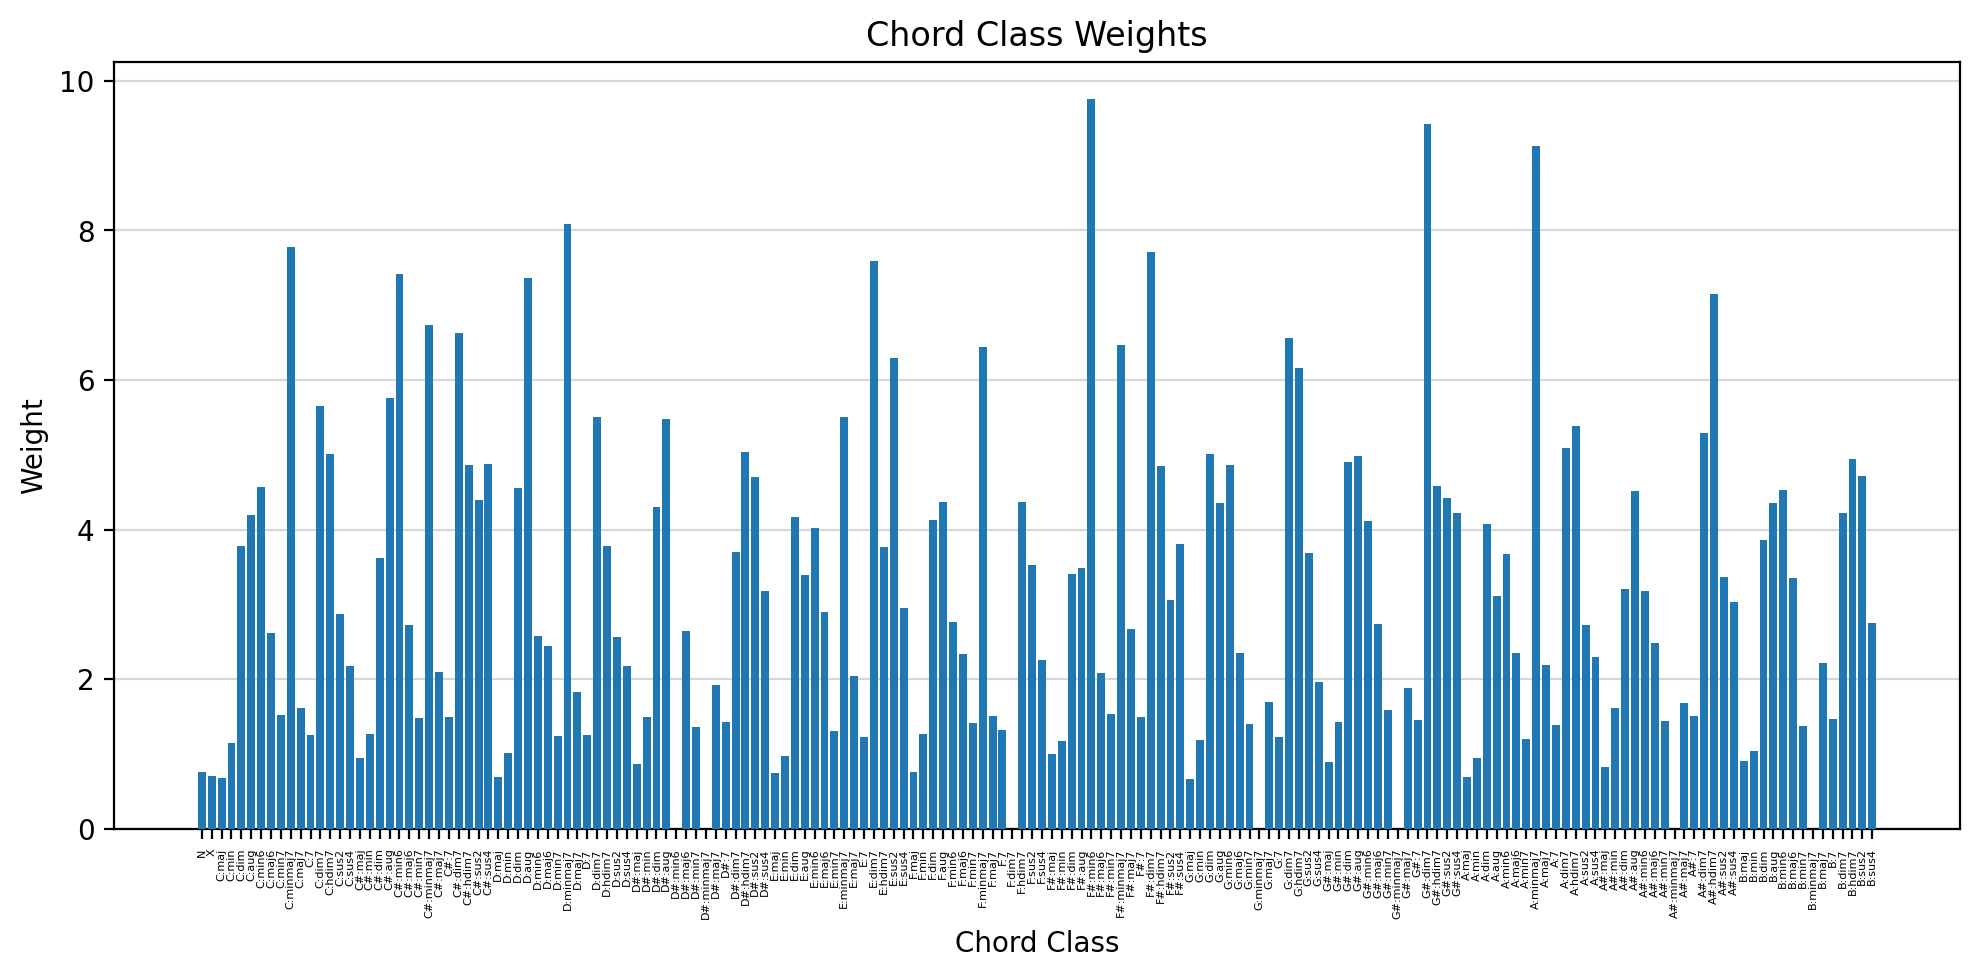

In [60]:
# Weights hist
plt.figure(figsize=(10, 5))
plt.grid(axis='y', alpha=0.5, zorder=-1)
plt.bar(range(len(weights)), weights, zorder=3, color='tab:blue')
plt.xlabel('Chord Class')
plt.ylabel('Weight')
plt.title('Chord Class Weights')
plt.xticks(range(len(weights)), [id_to_chord(c) for c in range(NUM_CHORDS)] , rotation=90, fontsize=4)
plt.tight_layout()
plt.savefig('./thesis/figures/class_weights.png', bbox_inches='tight')
plt.show()